In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 9]
from datetime import timedelta
import pywt

In [2]:
data = pd.read_csv("Data/daneOkresoweKSE.csv", sep=';', skiprows=1, names=['Date', 'Hour', 'Minute', 'Load'])
Electric = data.copy()
Electric['Date'] = pd.to_datetime(Electric.Date)
Electric.loc[Electric.Hour == 24, 'Date'] = Electric.loc[Electric.Hour == 24, 'Date'] + timedelta(days=1)
Electric.loc[Electric.Hour == 24, 'Hour'] = 0
Electric.Date = pd.to_datetime(Electric.Date.astype(str) + ' ' + Electric['Hour'].astype(str) + ':' + Electric.Minute.astype(str) + ':00')
Electric.set_index('Date', inplace=True)

maximum level is 15


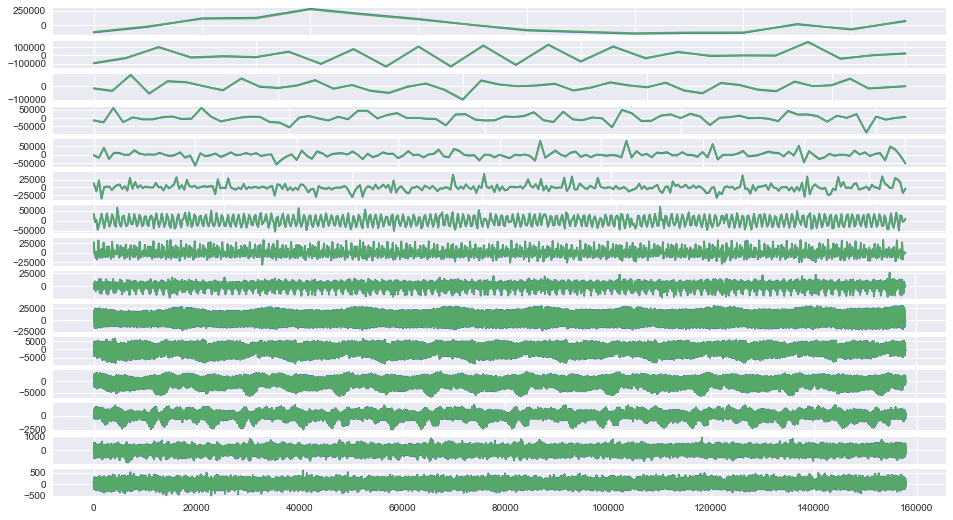

In [34]:
w = pywt.Wavelet('sym4')
maxlev = pywt.dwt_max_level(len(data), w.dec_len)
# maxlev = 6 # Override if desired
print("maximum level is " + str(maxlev))
threshold = 0.04 # Threshold for filtering

# Decompose into wavelet components, to the level selected:
coeffs = pywt.wavedec(Electric.Load.to_numpy(), 'sym4', level=maxlev)

#cA = pywt.threshold(cA, threshold*max(cA))
plt.figure()
for i in range(1, len(coeffs)):
    plt.subplot(maxlev, 1, i)
    plt.plot(coeffs[i])
    coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))
    plt.plot(coeffs[i])

In [35]:
datarec = pywt.waverec(coeffs, 'sym4')

Text(0.5, 1.0, 'De-noised signal using wavelet techniques')

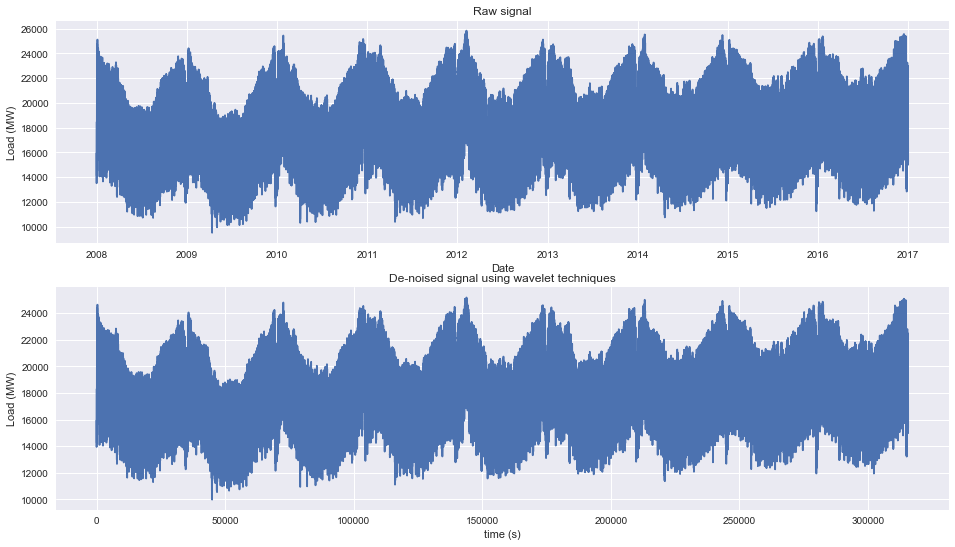

In [38]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(Electric.Load)
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.title("Raw signal")
plt.subplot(2, 1, 2)
plt.plot(datarec)
plt.xlabel('time (s)')
plt.ylabel('Load (MW)')
plt.title("De-noised signal using wavelet techniques")

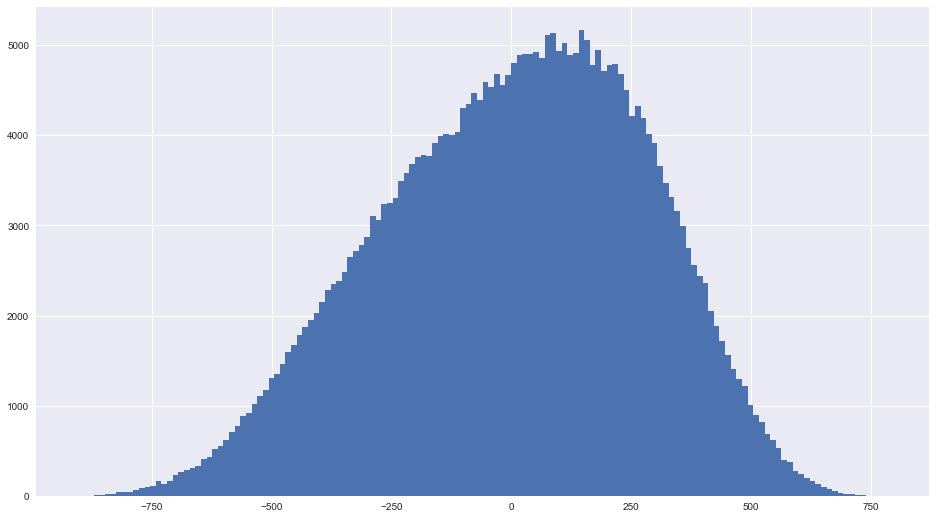

In [39]:
plt.hist(Electric.Load.to_numpy() - datarec, bins='auto');